In [ ]:
from __future__ import print_function, division
# TODO: Add noise
%load_ext autoreload
%autoreload 2


import os

# TODO: make the gpu selection an input variable
os.environ["CUDA_VISIBLE_DEVICES"] = '7'

from datasets import dataset_dict

dataset = dataset_dict['phototourism']\
          ('/home/zt16/code/priv-nerf/nerf_pl/data/brandenburg_gate/', 'train', img_downscale=8, use_cache=True)

In [2]:
rays_o, rays_d = dataset.all_rays[:10880, :3], dataset.all_rays[:10880, 3:6]
near, far = dataset.all_rays[:10880, 6:7], dataset.all_rays[:10880, 7:8]

start = (rays_o + near * rays_d).numpy()
end = (rays_o + far * rays_d).numpy()

### Blue points: scene geometry
### Red points: all cameras
### Purple point: an example camera
### Green frustum: the viewing frustum of the purple camera. It should cover the scene geometry. 

## You can move around using nbviewer!

In [3]:
import plotly.graph_objects as go

fig = go.Figure()

z_in_range = dataset.xyz_world[:, 2]<5
skip = 5

fig.add_trace(
    go.Scatter3d(
        x=dataset.xyz_world[z_in_range, 0][::skip],
        y=dataset.xyz_world[z_in_range, 1][::skip],
        z=dataset.xyz_world[z_in_range, 2][::skip],
        mode='markers',
        name='scene',
        marker=dict(size=0.3)
    )
)

fig.add_trace(
    go.Scatter3d(
        x=dataset.poses[:, 0, 3],
        y=dataset.poses[:, 1, 3],
        z=dataset.poses[:, 2, 3],
        mode='markers',
        name='cameras',
        marker=dict(size=1)
    )
)

xlines = []
ylines = []
zlines = []
for i in [0, 127, -128, -1]:
    xlines += [start[i, 0], end[i, 0], None]
    ylines += [start[i, 1], end[i, 1], None]
    zlines += [start[i, 2], end[i, 2], None]
    
for p in [[0, 127], [127, -1], [-128, -1], [-128, 0]]:
    xlines += [start[p[0], 0], start[p[1], 0], None]
    ylines += [start[p[0], 1], start[p[1], 1], None]
    zlines += [start[p[0], 2], start[p[1], 2], None]
    xlines += [end[p[0], 0], end[p[1], 0], None]
    ylines += [end[p[0], 1], end[p[1], 1], None]
    zlines += [end[p[0], 2], end[p[1], 2], None]

fig.add_trace(
    go.Scatter3d(
        x=xlines,
        y=ylines,
        z=zlines,
        mode='lines',
        name='frustum',
        marker=dict(size=1)
    )
)

pose = dataset.poses_dict[dataset.img_ids_train[0]]


fig.add_trace(
    go.Scatter3d(
        x=[pose[0, 3]],
        y=[pose[1, 3]],
        z=[pose[2, 3]],
        mode='markers',
        name='camera',
        marker=dict(size=4)
    )
)

fig.show()

### The image taken from the purple camera

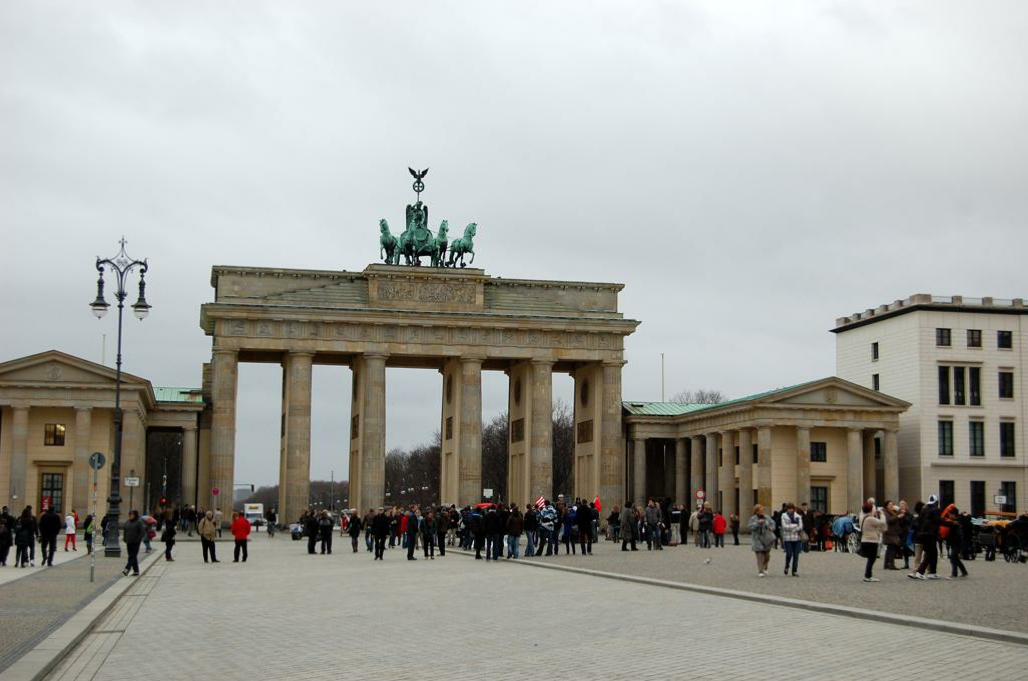

In [4]:
from PIL import Image

Image.open(os.path.join('/home/ubuntu/data/IMC-PT/brandenburg_gate/dense/images',
                        dataset.image_paths[dataset.img_ids_train[0]])).convert('RGB')